In [5]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib as mpl

f_bring = Table.read('Data/binned_BRING.dat', format='ascii.ecsv')
f_astep = Table.read('Data/binned_ASTEP.dat', format='ascii.ecsv')
f_brite = Table.read('Data/binned_BRITE.dat', format='ascii.ecsv')

transit_times = np.array([8210,8707,9413])+50000
color = ['r', 'green', 'dodgerblue']
name_instrument = ["BRING", "ASTEP", "BRITE"]


(-0.1, 0.1)

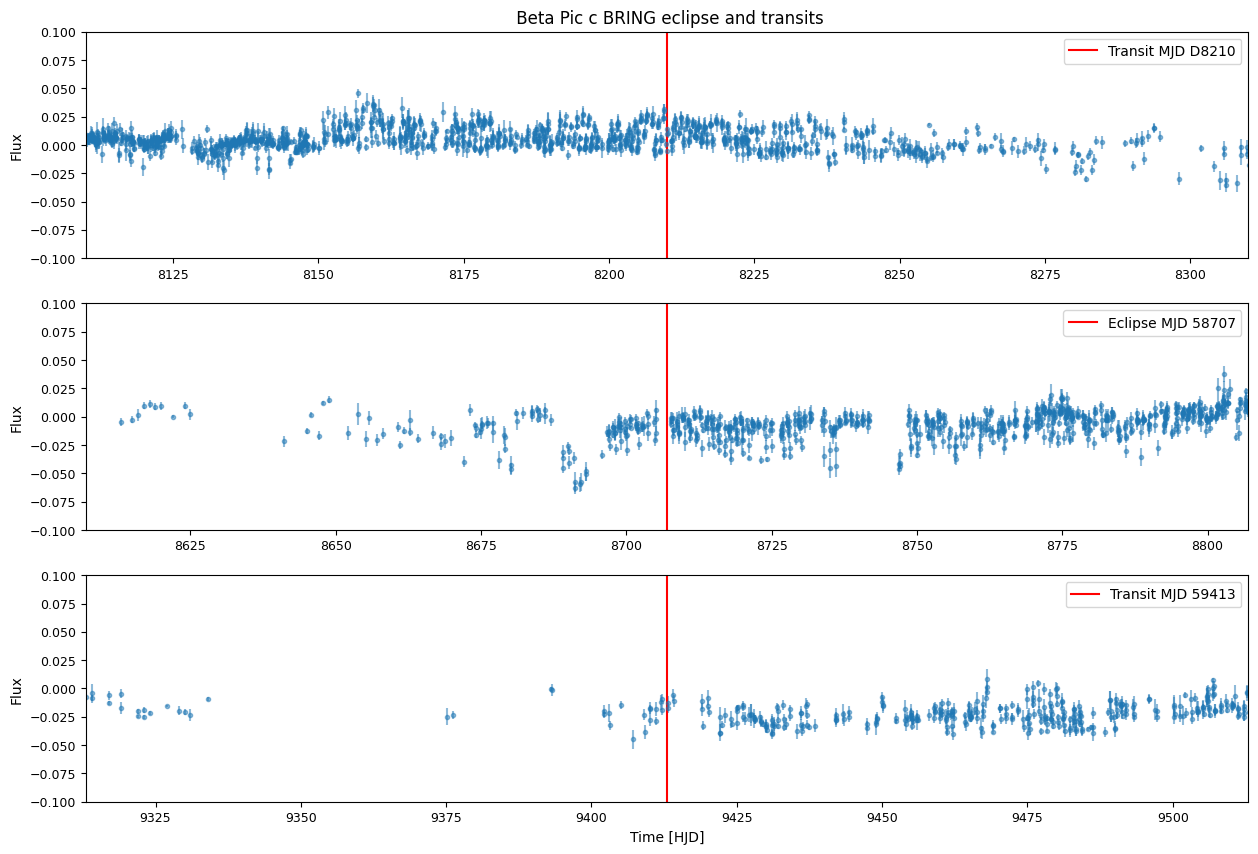

In [6]:
t_bring_sel, f_bring_sel, f_bring_sig_sel = f_bring['time'],f_bring['flux'],f_bring['ferr']


epoch1 = 8210
err_epoch = 100
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15,10))
ax1.set_title(' Beta Pic c BRING eclipse and transits')
ax1.errorbar(t_bring_sel-57000+7000, f_bring_sel, yerr=f_bring_sig_sel, fmt='.', alpha=0.5)
ax1.axvline(epoch1, color = 'red' , label = 'Transit MJD D8210')
ax1.legend()
ax1.set_xlim(epoch1-err_epoch , epoch1+err_epoch)
ax1.set_ylim(-0.1,0.1)
ax1.set_ylabel('Flux')

ax2.errorbar(t_bring_sel-57000+7000, f_bring_sel, yerr=f_bring_sig_sel, fmt='.', alpha=0.5)
ax2.axvline(58707-57000+7000, color = 'red' , label = 'Eclipse MJD 58707')
ax2.legend()
ax2.set_xlim(8707-err_epoch, 8707+err_epoch)
ax2.set_ylim(-0.1,0.1)
ax2.set_ylabel('Flux')

ax3.errorbar(t_bring_sel-57000+7000, f_bring_sel, yerr=f_bring_sig_sel, fmt='.', alpha=0.5)
ax3.axvline(59413-57000+7000, color = 'red' , label = 'Transit MJD 59413')
ax3.set_xlim(9413-err_epoch, 9413+err_epoch)
ax3.set_xlabel('Time [HJD]')
ax3.set_ylabel('Flux')
ax3.legend()
ax3.set_ylim(-0.1,0.1)


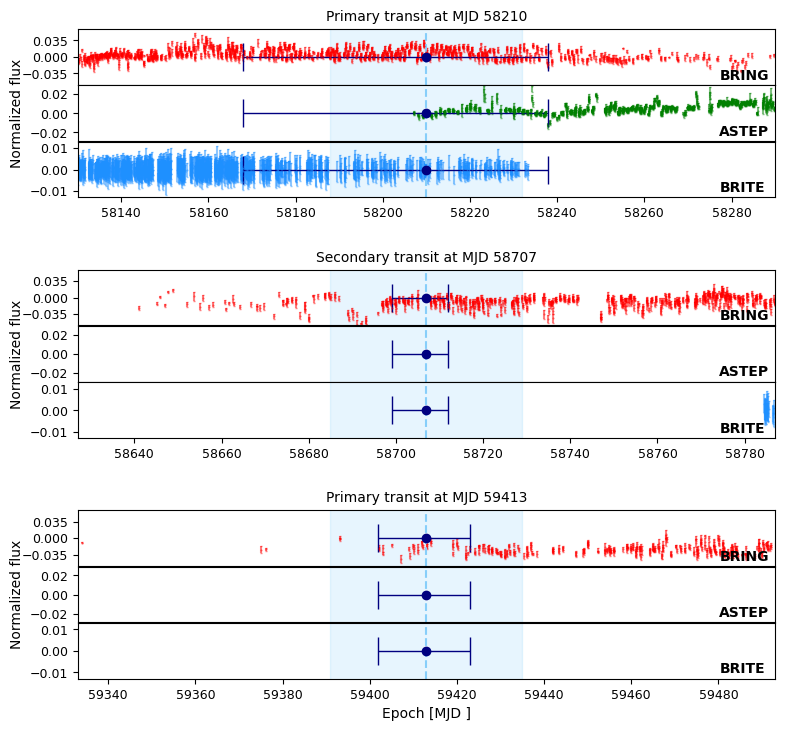

In [8]:

d_lim =80 #limit transit end and start in days
fs=10
label_size = 9
data_sets = [f_bring, f_astep, f_brite ]
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 



fig = plt.figure(figsize=(9,7)) 
subfigs = fig.subfigures(nrows=3, ncols=1, hspace=0.1)
axs = [subfig.subplots(nrows=3, ncols=1, gridspec_kw={'hspace': 0.01}) for subfig in subfigs.ravel()]

for x, subax in enumerate(axs):
    for y, ax in enumerate(subax):
        data = data_sets[y]
        ax.errorbar(data['time'], data['flux'], yerr=data['ferr'], fmt='.', alpha=0.5, label =name_instrument[y], 
                    color =color[y],capsize=1, markersize=1)
        ax.text(0.92,0.1,name_instrument[y], transform=ax.transAxes,  fontweight='bold', fontsize = fs) 
        ax.fill_between(np.linspace(58188, 58232) , -0.2, 0.2,
                     color = 'lightskyblue', alpha =0.2)
        ax.errorbar(58210, 0,xerr=[[42],[28]], fmt='o', color="navy", capsize=10, elinewidth=1, mew =1)
        ax.errorbar(58707, 0,xerr=[[8],[5]], fmt='o', color="navy", capsize=10, elinewidth=1, mew =1)
        ax.errorbar(59413, 0,xerr=[[11],[10]], fmt='o', color="navy", capsize=10, elinewidth=1, mew =1)
        ax.fill_between(np.linspace(58685, 58729) , -0.2, 0.2,
                     color = 'lightskyblue', alpha =0.2)
        ax.fill_between(np.linspace(59391, 59435) , -0.2, 0.2,
                     color = 'lightskyblue', alpha =0.2)
        ax.axvline(transit_times[x], color='lightskyblue', linestyle = '--')
        

        if y ==0:
            ax.set_ylim(-0.059,0.059)
            ax.yaxis.set_major_locator(MultipleLocator(0.035))
            ax.set_xticks([])
        if y ==1:
            ax.set_ylim(-0.029,0.029)
            ax.yaxis.set_major_locator(MultipleLocator(0.02))
            ax.set_xticks([])
            ax.set_ylabel("Normalized flux")
        if y ==2:
            ax.set_ylim(-0.013,0.013)
            ax.yaxis.set_minor_locator(MultipleLocator(0.01))
        if x==0 and y==0:
            ax.set_title("Primary transit at MJD 58210", fontsize = fs)
        if x==1 and y==0:
            ax.set_title("Secondary transit at MJD 58707", fontsize =fs)
        if x==2 and y==0:
            ax.set_title("Primary transit at MJD 59413", fontsize = fs)
        ax.set_xlim(transit_times[x]-d_lim , transit_times[x]+d_lim)
        if x==2 and y==2:
            ax.set_xlabel('Epoch [MJD ]')

plt.savefig(f'Figures/All_photometric_transits.pdf', bbox_inches='tight')
plt.show()